# Titanic Passengers Survival Prediction

In [20]:
import pandas as pd

Import the train data from corresponding csv file

In [21]:
data = pd.read_csv('train.csv')

In [22]:
data.shape

(891, 12)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We need to handle the null values <br/>
Since there are only 204 non-null values for 'Cabin', we can drop the column

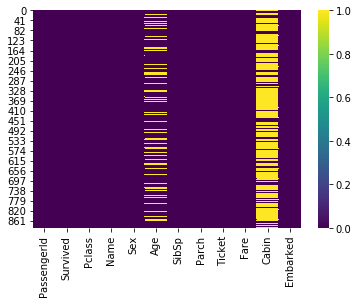

In [24]:
import seaborn as sns
sns.heatmap(data.isnull(),cmap='viridis')

In [25]:
data.drop('Cabin',inplace=True,axis=1)

Also name and Ticket does not have any significance on the problem statement.

In [26]:
data.drop(['Name','Ticket'],inplace=True,axis=1)

In [27]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [28]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


Since two of the 'Embarked' column has null values, we will remove those two particular rows from the dataframe

In [31]:
data.drop([61,829],axis=0,inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


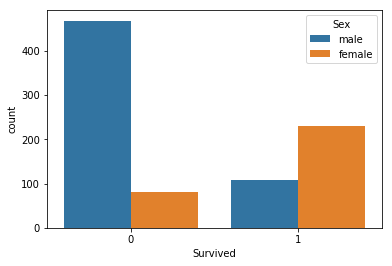

In [41]:
sns.countplot(x=data['Survived'],hue=data['Sex'])

We can see that most of the survivors are Female.

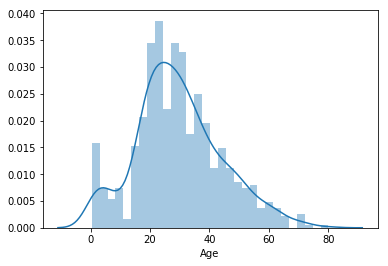

In [43]:
sns.distplot(data['Age'].dropna(),kde=True,bins=30)

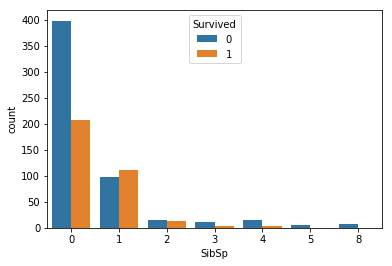

In [45]:
sns.countplot(x='SibSp',data=data,hue='Survived')

Less number of siblings tends to higher survival rate

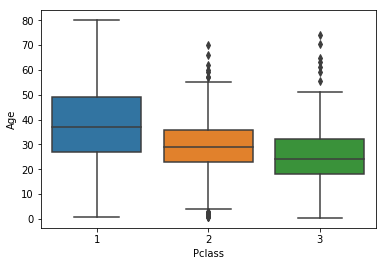

In [60]:
sns.boxplot(x='Pclass',y='Age',data=data)

In order to deal with null values in age column, we wrote a function 'impute_age'. <br/>
According above distplot, we got the the age distribution for each 'pclass'. <br/>
For pclass=1, age mean is 37,For pclass=2, age mean is 29,For pclass=3, age mean is 24 <br/>
So based on the pclass, we will fill the age with corresponding mean value.

In [61]:
def impute_age(cols):
    age = cols[0];
    pclass = cols[1];
    if(pd.isnull(age)):        
        if(pclass == 1):
            return 37
        elif(pclass == 2):
            return 29
        else:
            return 24
    else:
        return age

In [63]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 109.5+ KB


Next we need to create Dummy variables for Sex and Embarked columns. <br/>
Then we need to replace Dummy with the originals.

In [67]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embarked = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked'],axis=1,inplace=True)
data = pd.concat([data,sex,embarked],axis=1)

In [73]:
from sklearn.linear_model import LogisticRegression

In [83]:
lr = LogisticRegression(solver='liblinear')

In [76]:
from sklearn.model_selection import train_test_split
data.drop(['PassengerId'],axis=1,inplace=True)

In [79]:
y = data['Survived']
X = data.drop('Survived',axis=1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [85]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
lr.score(X_test,y_test)

0.8089887640449438

In [88]:
predictions=lr.predict(X_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [92]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]
